### Simple Linear Regression on powerproduction dataset
#### GMIT Fun Data Analysis Project - Brendan Ryan

Introduction - a little bit of reaserch etc

Simple Linear Regression – in simple terms fit a straight line to a dataset
Problem electricity generation – sell electricity ahead of time - generate exactly the amount required.  Wind speed Is volatile so need to use predictions etc 
Simple formula for a line Y = mx + c
Does it fit curve better than a straight line – complex linear regression ?


In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load in the dataset
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

In [3]:
#have a look at dataset to make sure everything is ok
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [4]:
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [5]:
#Delete rows where "Duration" is equal to 0 - https://www.w3schools.com/python/pandas_cleaning_wrong_data.asp
#for x in df.index:
  #if df.loc[x, "power"] == 0:
    #df.drop(x, inplace = True)

In [6]:
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [7]:
#lets have a look at a simple plot

In [8]:
s = np.array(df["speed"])
p = np.array(df["power"])

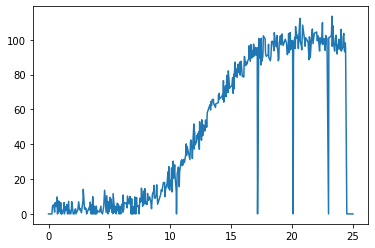

In [9]:
plt.plot(s,p);

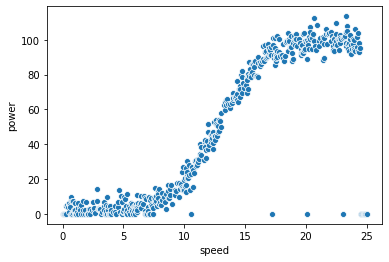

In [25]:
sns.scatterplot(data=df, x = "speed", y = "power");

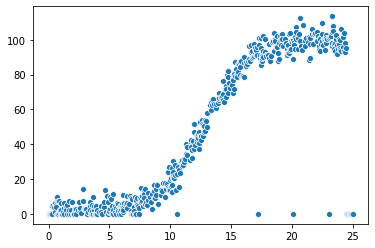

In [32]:
### Testomg from lectures videos 

a,m,n,t = 2011.1, 2.6650, 622.922, 1.4090

#u = np.linspace(0.0,30.0,1000)

P_u = a * (1.0 + m * np.exp(-s/t)) / (1.0 + n * np.exp (-s / t))
df['test'] = P_u
#sns.scatterplot(data=df, x = "speed", y = "power");
sns.scatterplot(s,p);


## Research on Regression and Simple Linear Regression

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.

Simple linear regression is used to estimate the relationship between two quantitative variables. You can use simple linear regression when you want to know:

- How strong the relationship is between two variables (e.g. the relationship between rainfall and soil erosion).
- The value of the dependent variable at a certain value of the independent variable (e.g. the amount of soil erosion at a certain level of rainfall).


In [12]:
#from sklearn.linear_model import LinearRegression 
#lin = LinearRegression() 
  
#lin.fit(s, p) 

https://www.scribbr.com/statistics/simple-linear-regression/

## Draw line to best fit 

- https://en.wikipedia.org/wiki/Curve_fitting
- https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
- https://en.wikipedia.org/wiki/Simple_linear_regression

Calculate the mean values of our "p" power and "s" speed data

Numpy has a function named polyfit which can be used to fit lines to many dimensions

In [33]:
#calculate relationship using nump
coeffs = np.polyfit(s,p,1)
coeffs

array([  4.91759567, -13.89990263])

 forumla for straight line y = a*x + b
 5.61882784 is the regression coefficient (the a value) and -19.83768545- is the intercept (the b value).

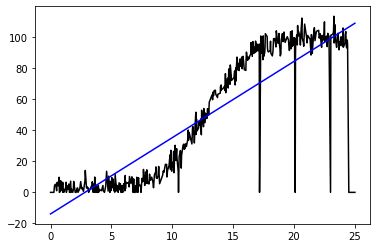

In [34]:
plt.plot(s,p, 'k', label = "Source Data");
plt.plot(s, coeffs[0] * s + coeffs[1], "b-", label = "best fit line");# remember y = mx + c equation for straight line 
plt.show()

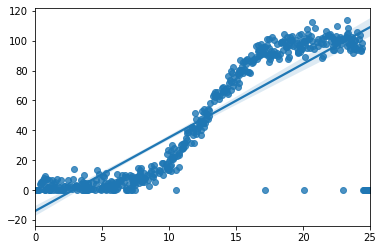

In [35]:
#sns.regplot(data=df, x = "speed", y = "power");
sns.regplot(s,p);

Ok so a straigth line does not fit this dat set very well 

In [16]:
#from scipy import stats
#slope, intercept, r, p, std_err = stats.linregress(s,p)
#print(r)

### Polynominal Regression as it would fit better i think 

If the data points clearly will not fit a linear regression (a straight line through all data points), it might be ideal for polynomial regression.

Polynomial regression, like linear regression, uses the relationship between the variables x and y to find the best way to draw a line through the data points.

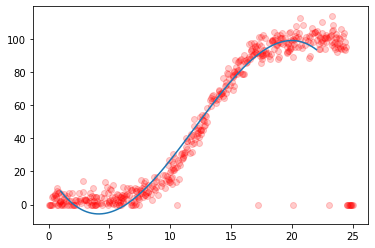

In [36]:
mymodel = np.poly1d(np.polyfit(s, p, 3))

line = np.linspace(1, 22, 100)

plt.scatter(s, p,color='red',alpha=0.2)
plt.plot(line, mymodel(line))
plt.show();

sure looks a better fit

https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/


Advantages of using Polynomial Regression:

Broad range of function can be fit under it.
Polynomial basically fits wide range of curvature.
Polynomial provides the best approximation of the relationship between dependent and independent variable.
Disadvantages of using Polynomial Regression

These are too sensitive to the outliers.
The presence of one or two outliers in the data can seriously affect the results of a nonlinear analysis.
In addition there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.

Making predictions with Poly1 d - https://data36.com/linear-regression-in-python-numpy-polyfit/

In [37]:
#redict = np.poly1d(coeffs)
#ind_predict = predict(20)
#rint(wind_predict)

test = mymodel(20)
print (test)

98.93299717659598


Check model accuracy

In [38]:
from sklearn.metrics import r2_score
print(r2_score(p, mymodel(s)))

0.8796883953739737


closer it is to 1 the more accurate your linear regression model is

### Compare with K Nearest Neighbours Regression

## Using Scipy for predictions 

w3s schools regresion 

In [20]:
from scipy import stats

In [21]:
#slope, intercept, r, p, std_err = stats.linregress(s,p)

In [22]:
def myfunc (x):
    return slope * x + intercept

In [23]:
output = myfunc(10)
#print (output)

NameError: name 'slope' is not defined

## Using Sklearn for Predictions

wcs schools very good tutorials 

In [ ]:
from sklearn.metrics import r2_score
#print(r2_score(p, model(s)))

References 

https://towardsdatascience.com/how-we-made-profits-forecasting-wind-energy-production-levels-b93bd3a7f1ed

https://data36.com/linear-regression-in-python-numpy-polyfit/